4
feature 0 threshold 4.4 gain [0.00661608]
The threshold and gain 4.4   [0.00661608]
feature 0 threshold 4.5 gain [0.02023743]
The threshold and gain 4.5   [0.02023743]
feature 0 threshold 4.6 gain [0.0272504]
The threshold and gain 4.6   [0.0272504]
feature 0 threshold 4.7 gain [0.04914804]
The threshold and gain 4.7   [0.04914804]
feature 0 threshold 4.8 gain [0.05674825]
The threshold and gain 4.8   [0.05674825]
feature 0 threshold 4.9 gain [0.08051913]
The threshold and gain 4.9   [0.08051913]
feature 0 threshold 5.0 gain [0.08232605]
The threshold and gain 5.0   [0.08232605]
feature 0 threshold 5.1 gain [0.10829932]
The threshold and gain 5.1   [0.10829932]
feature 0 threshold 5.2 gain [0.16933821]
The threshold and gain 5.2   [0.16933821]
feature 0 threshold 5.3 gain [0.19172982]
The threshold and gain 5.3   [0.19172982]
feature 0 threshold 5.4 gain [0.20342287]
The threshold and gain 5.4   [0.20342287]
feature 0 threshold 5.5 gain [0.24063492]
The threshold and gain 5.5   [0.24

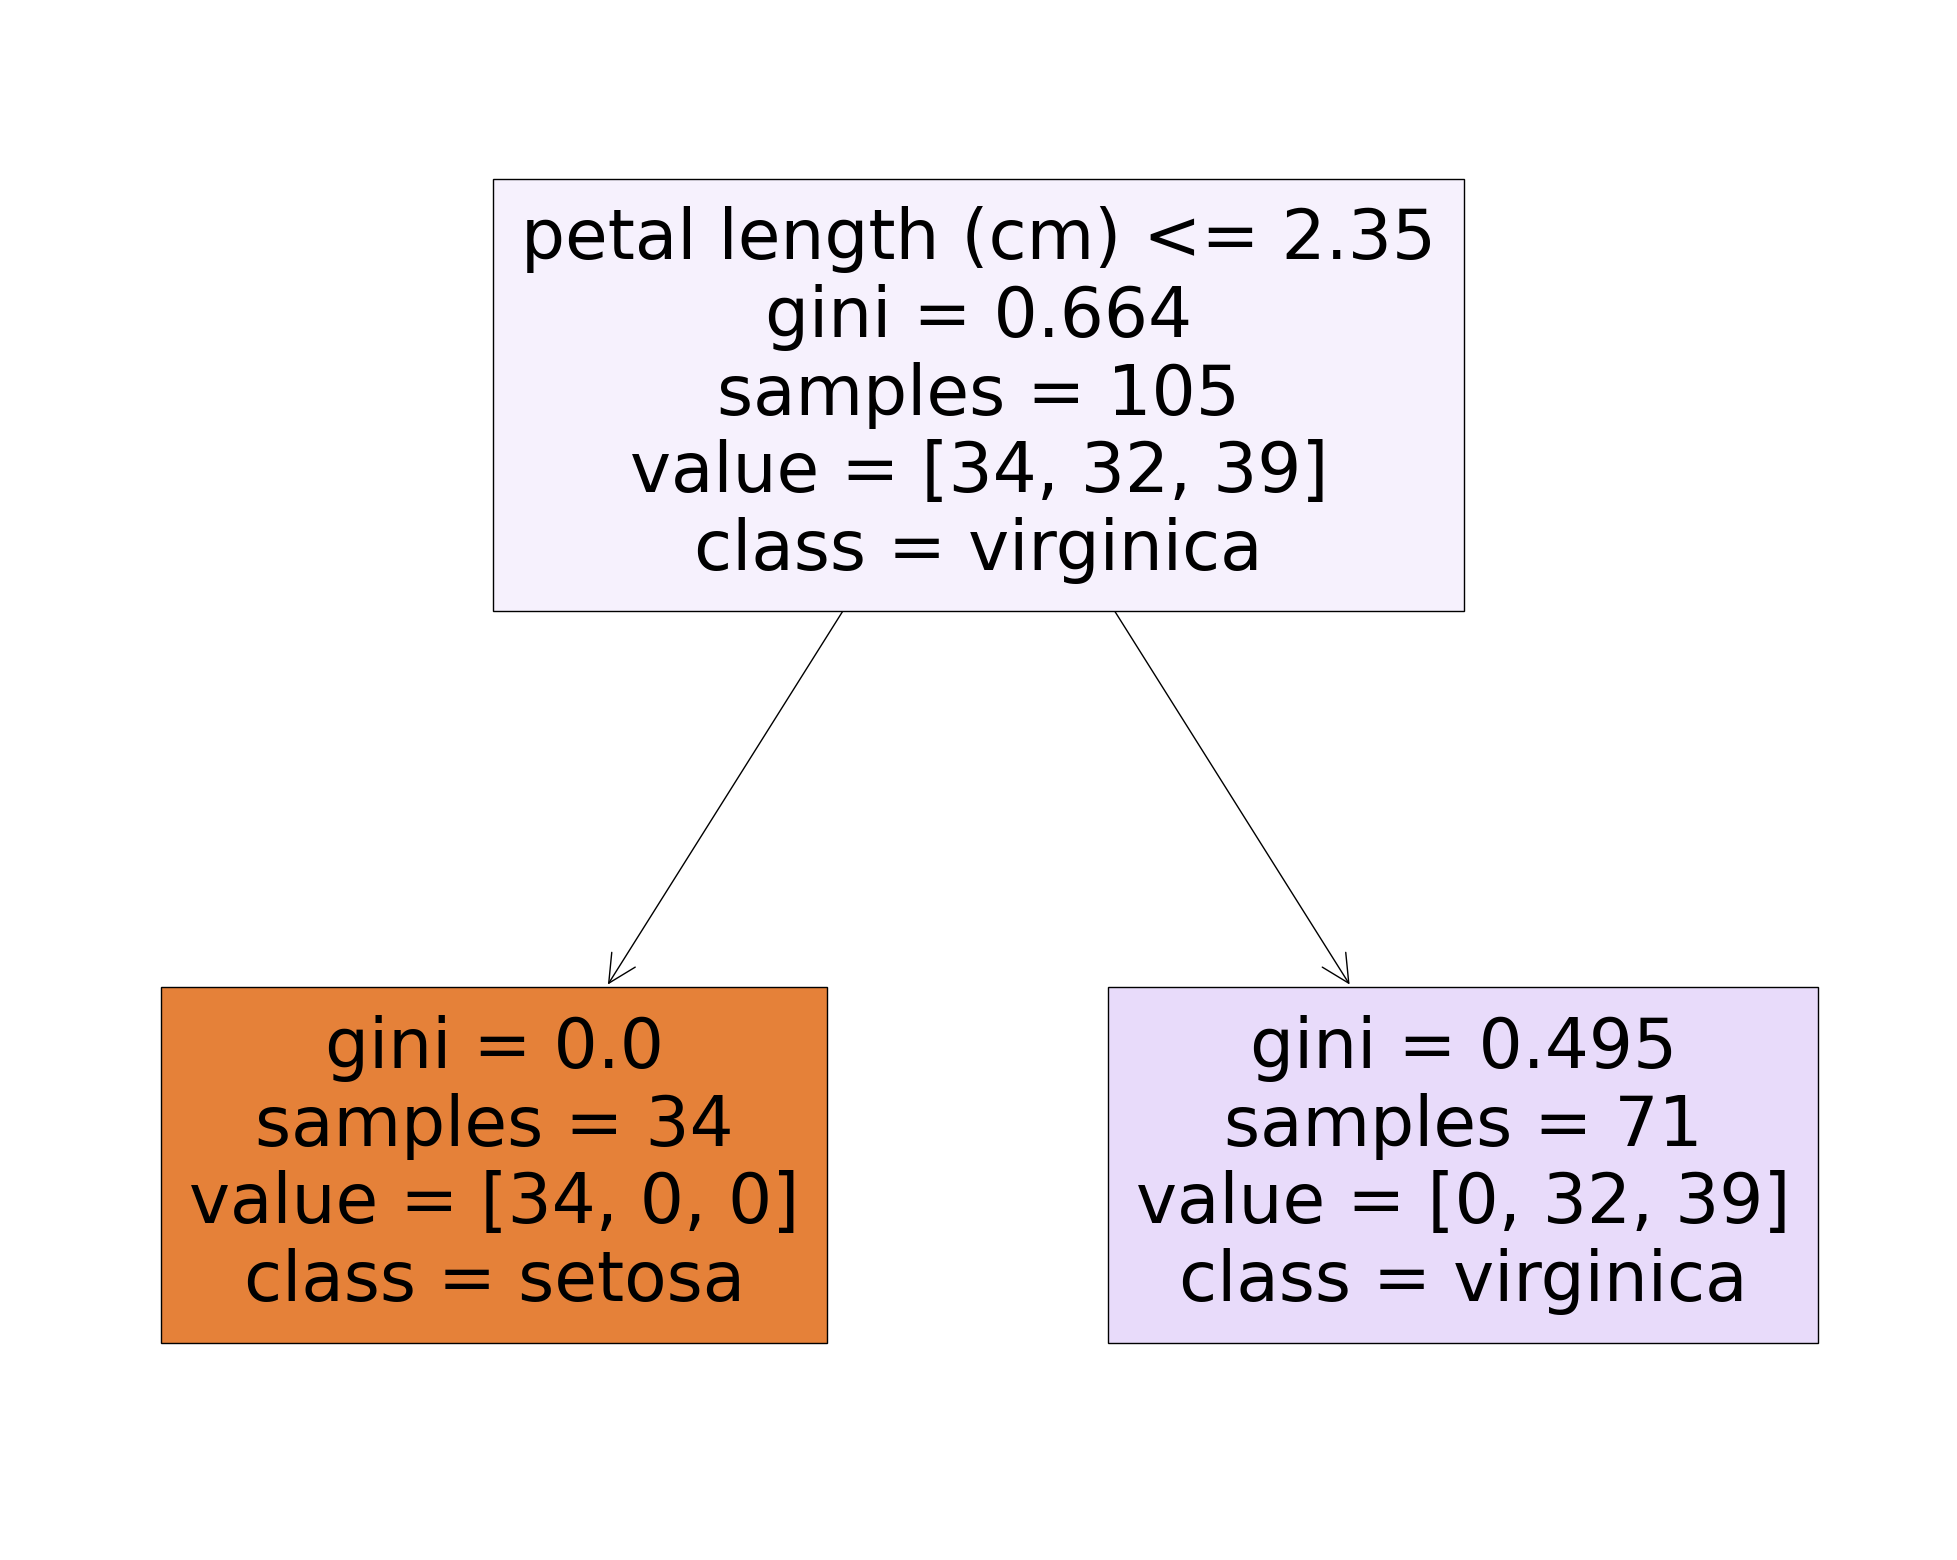

In [17]:
# Assignment: Decision tree
# Objectives:
# 1. Understanding decision trees through scratches
# 2. Get used to implementing complex algorithms
# -------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import collections
import matplotlib.pyplot as plt
import statistics

class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose):
        # Record hyperparameters as attributes
        self.verbose = verbose

    # Problem 3: Learning
    # -------------------
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.gain = 0
        print(X.shape[1])
        for feature_index in range(X.shape[1]):
            self.thresholds = np.unique(X[:,feature_index])
            for threshold in self.thresholds:
                _gain = self._calc_ig(X,feature_index,y,threshold)
                if _gain > self.gain:
                    self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                    self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                    self.feature = feature_index
                    self.threshold = threshold
                    self.gain = _gain
                    if self.verbose:
                        print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)
                    if self.verbose == True:
                        print('The threshold and gain {}   {}'.format(threshold,self.gain))
        pass

    # Problem 4: Estimate
    # -------------------
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
        return prediction
        
        
    #  Problem 1: Function for finding impureness
    # -------------------------------------------
    def _calc_gini(self,y):
        labels,counts = np.unique(y,return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    # Problem 2: Function for finding information gain 
    # ------------------------------------------------
    def _calc_ig(self,X,feature_index,y,threshold):
        labels_l = y[X[:,feature_index] < threshold]
        labels_r = y[X[:,feature_index] >= threshold]
        gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
        gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
        gain = self._calc_gini(y) -gain_l -gain_r
        return gain

# Problem 5: Learning and estimation 
# ----------------------------------
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size=0.3, random_state=0)
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train, y_train)
train_prediction = clf.predict(X_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_prediction)

from sklearn.metrics import precision_score
precision_score(y_train, train_prediction, average='micro')

from sklearn.metrics import recall_score
recall_score(y_train, train_prediction, average='micro')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


#  Problem 6: Visualization of decision area
#  -----------------------------------------
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris_dataset.feature_names,  
                   class_names=iris_dataset.target_names,
                   filled=True)

# Problem 7: (Advance assignment) Creation of a decision tree classifier class with a depth of 2
# ----------------------------------------------------------------------------------------------
class Node():
    """
    A class that composes and separates the nodes of a decision tree.
    Parameters:
    ---------------
    verbose : bool
        True if you want to output the learning progress
    max_depth = int
        Maximum training depth of decision tree
    """
    def __init__(self, max_depth = None, verbose = False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
        self.feature = None

    def _separate(self, X, y, depth):
        """
        Split nodes using the CART method.
        Parameters:
        ---------------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,) of the following form
            Label value of training data
        depth : int
            the depth of node
        """
        self.depth = depth
        features = X.shape[1]

        if len(np.unique(y))  == 1:
            self.label = np.unique(y)[0]
            return
        
        if self.depth == self.max_depth:
            self.label = statistics.mode(y)
            return
        
        self.gain = 0

        for feature_number in range(features):
            thresholds = np.unique(X[:,feature_number])
            for threshold_value in thresholds[1:]:
                labels_l = y[X[:,feature_number] < threshold_value]
                labels_r = y[X[:,feature_number] >= threshold_value]

                gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
                gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
                gain = self._calc_gini(y) -gain_l -gain_r

                if gain > self.gain:
                    self.feature = feature_number
                    self.threshold = threshold_value
                    self.gain = gain

        if self.verbose:
            print("depth", self.depth, 'feature',self.feature,'threshold',self.threshold,'gain',self.gain)
        
        l_X = X[X[:,self.feature] < self.threshold]
        l_y = y[X[:,self.feature] < self.threshold]
        self.left = Node(self.max_depth, self.verbose)
        self.left._separate(l_X, l_y, depth + 1)


        r_X = X[X[:,self.feature] >= self.threshold]
        r_y = y[X[:,self.feature] >= self.threshold]
        self.right = Node(self.max_depth, self.verbose)
        self.right._separate(r_X, r_y, depth + 1)
    
    def _calc_gini(self, y):
        """
        Calculate Gini Impurity
        Parameters
        --------------
        X : ndarray, shape (n_samples,) of the following form
            Features of training data
        """
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini
    
    def _predict(self, X):
        """
        Estimate label
        """
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        else:
            if X[self.feature] < self.threshold:
                return self.left._predict(X)
            else:
                return self.right._predict(X)



class ScratchDecisionTreeClassifier():
    '''
    Scratch implementation of a decision tree classifier of depth n
    Parameters:
    ---------------
    verbose : bool
        True if you want to output the learning progress
    max_depth = int
        Maximum training depth of decision tree
    '''

    def __init__(self, max_depth = 1, verbose = False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
    
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Label values of training data
        """

        self.depth = 0
        self.root = Node(self.max_depth, self.verbose)
        self.root._separate(X, y, self.depth)

    def predict(self, X):
        """"
        Estimate labels using a decision tree classifier
        """
        y_pred = np.zeros(len(X))
        
        for i, x in enumerate(X):
            y_pred[i] = self.root._predict(x)
        return y_pred


def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print("mesh shape:{}".format(mesh.shape))
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=matplotlib.colors.ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

#clf = DecisionTreeClassifier(max_depth=2)
#clf.fit(X_train,y_train)

# Predict Accuracy Score
#y_pred = clf.predict(X_test)

clf2 = ScratchDecisionTreeClassifier(max_depth= 2, verbose = True)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf2.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


# Problem 8: (Advance assignment) Creation of decision tree classifier class with unlimited depth
# -----------------------------------------------------------------------------------------------
clf3 = ScratchDecisionTreeClassifier(max_depth= 3, verbose = True)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

# Predict Accuracy Score
y_pred = clf3.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf3.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))
